#### Question 9
Consider the wave function of the form
\begin{equation}
\frac { \partial ^ { 2 } \phi } { \partial t ^ { 2 } } = v ^ { 2 } \frac { \partial ^ { 2 } \phi } { \partial x ^ { 2 } }
\end{equation}
This wave has the initial conditions that the string is fixed
\begin{equation}
\phi ( x = 0 , t ) = \phi ( x = L , t ) = 0
\end{equation}
with the additional restrictions on the displacement and velocity,written as
\begin{equation}
\phi _ { 0 } ( x ) = \phi ( x , t = 0 ) , \psi _ { 0 } ( x ) = \psi ( x , t = 0 ) = \frac { \partial \phi ( x , t = 0 ) } { \partial t }
\end{equation}

These initial conditions can be written as Fourier Sine Series
\begin{equation}
\phi _ { 0 } ( x ) = \sum _ { k = 1 } ^ { \infty } \tilde { \phi } _ { 0 , k } \sin ( k \pi x / L ) , \psi _ { 0 } ( x ) = \sum _ { k = 1 } ^ { \infty } \tilde { \psi } _ { 0 , k } \sin ( k \pi x / L )
\end{equation}
Now the wave function has a unique solution that consists of separation of variables
\begin{equation}
\phi( x , t ) = X ( x ) T ( t )
\end{equation}
which allow us to solve two separate ODEs
\begin{equation}
X ^ { \prime \prime } + \beta ^ { 2 } X = 0 \quad \text { and } \quad T ^ { \prime \prime } + v^ { 2 } \beta ^ { 2 } T = 0
\end{equation}
which have the solutions
\begin{equation}
\begin{aligned} X ( x ) & = C \cos \beta x + D \sin \beta x \\ T ( t ) & = A \cos \beta v t + B \sin \beta v t \end{aligned}
\end{equation}
Now given the initial boundary conditions, we arrive at the desired result
\begin{equation}
\phi ( x , t ) = \sum _ { k = 1 } ^ { \infty } \sin ( k \pi x / L ) \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right]
\end{equation}
where 
\begin{equation}
\omega =  \frac{\pi v k}{L}
\end{equation}

From this analytic solution, I can use the spectral method to arrive at my answer. 
The particular problem I am looking at is 9.5 from Newman, which gives an initial condition of 
\begin{equation}
\phi(x) = C\frac{x(L-x)}{L^2}\text{exp}[-\frac{(x-d)^2}{2\sigma^2}]
\end{equation}
and zero initial displacement, which mean the $\cos$ term is zero.

In [1]:
######################################################################
#
# Functions to perform fast discrete cosine and sine transforms and
# their inverses in one and two dimensions.  These functions work by
# wrapping the DFT function from numpy, rather than explicitly
# performing the cosine and sine transforms themselves.  The sine
# transforms take arrays whose first element is zero and return arrays
# whose first element is also zero.  This differs from some other
# implementations, which drop the first element, since it is always
# zero.
#
#   dct(y): Type-II discrete cosine transform (DCT) of real data y
#   idct(a): Type-II inverse DCT of a
#   dct2(y): 2D DCT of 2D real array y
#   idct2(a): 2D inverse DCT real array a
#   dst(y): Type-I discrete sine transform (DST) of real data y
#   idst(a): Type-I inverse DST of a
#   dst2(y): 2D DST of 2D real array y
#   idst2(a): 2D inverse DST real array a
#
# Written by Mark Newman <mejn@umich.edu>, June 24, 2011
# You may use, share, or modify this file freely
#
######################################################################


from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft


######################################################################
# 1D DCT Type-II

def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])


######################################################################
# 1D inverse DCT Type-II

def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]


######################################################################
# 2D DCT

def dct2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dct(y[i,:])
    for j in range(N):
        b[:,j] = dct(a[:,j])

    return b


######################################################################
# 2D inverse DCT

def idct2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idct(b[i,:])
    for j in range(N):
        y[:,j] = idct(a[:,j])

    return y


######################################################################
# 1D DST Type-I

def dst(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a


######################################################################
# 1D inverse DST Type-I

def idst(a):
    N = len(a)
    c = empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0

    return y


######################################################################
# 2D DST

def dst2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dst(y[i,:])
    for j in range(N):
        b[:,j] = dst(a[:,j])

    return b


######################################################################
# 2D inverse DST

def idst2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idst(b[i,:])
    for j in range(N):
        y[:,j] = idst(a[:,j])

    return y


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Defining Constants
h = 10e-6  # time step
L = 1   # Length of wire in metres
v = 100 # velocity in m/s
d = 0.1 # distance of hammer
C = 1   # 1 m/s
sigma = 0.3  # sigma in metres
N = 100 # grid spacings
a = L/N

In [4]:

iterations = np.array([2,4,6,12,100])/1000.
index = len(iterations)
displacement = np.zeros([index,N+1],float)
x = np.linspace(0,L,N+1)
k = np.arange(N+1)
initial_velocity = C * x*(L-x)/L**2*np.exp( -1*(x-d)**2/(2*sigma**2))
frequency = v*k*np.pi/L

In [5]:
for j in range(index):
    coeff = dst(initial_velocity)
    displacement_fourier_value = coeff*np.sin(frequency*iterations[j])/frequency
    displacement[j,:] = idst(displacement_fourier_value)

/home/andrew/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
dt = 0.1
old_iterations = int(dt/h)+1
print(old_iterations)
old_displacement = np.zeros([old_iterations,N+1],float)
old_velocity = np.zeros([old_iterations,N+1],float)
x = np.linspace(0,L,N+1)
old_velocity[0,:] = C * x*(L-x)/L**2*np.exp( -1*(x-d)**2/(2*sigma**2))

10001


In [18]:
for i in range(old_iterations-1): # time iteration
    for j in range(1,len(x)-1): # space iterations
        old_displacement[i+1,j] = old_displacement[i,j] +  h*old_velocity[i,j]
        old_velocity[i+1,j] = old_velocity[i,j] + \
        h*(v**2)/(a**2)*(old_displacement[i,j+1] + old_displacement[i,j-1] - 2*old_displacement[i,j])  

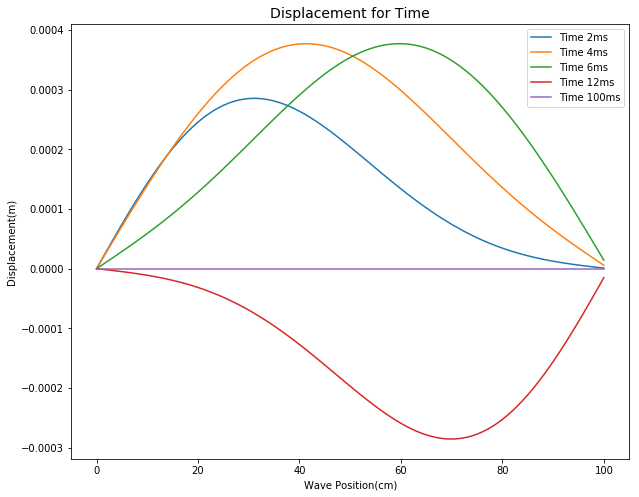

In [30]:
old_index = np.array([2,4,6,12,100])
plt.figure(figsize = [10,8])
plt.title('Displacement for Time', fontsize = (14))
plt.ylabel('Displacement(m)')
plt.xlabel('Wave Position(cm)')
for j in range(index):
    plt.plot(displacement[j,:], label = 'Time ' + np.str(old_index[j])+'ms')
plt.legend()
plt.show()

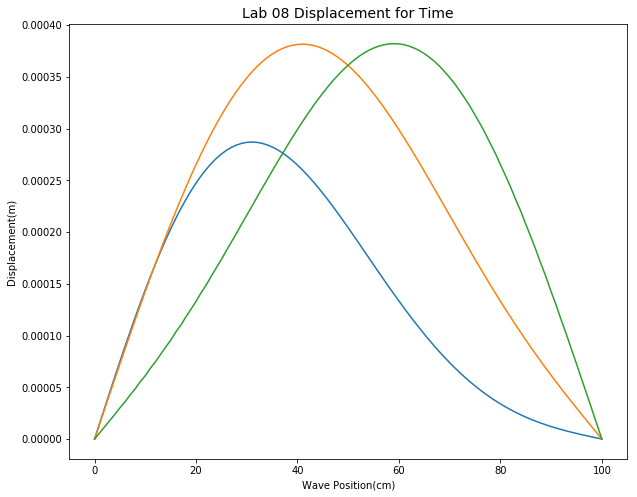

In [29]:
old_index = np.array([200,400,600,1200,10000])
plt.figure(figsize = [10,8])
plt.title('Lab 08 Displacement for Time', fontsize = (14))
plt.ylabel('Displacement(m)')
plt.xlabel('Wave Position(cm)')
for j in range(index-2):
    #plt.plot(displacement[j,:])
    plt.plot(old_displacement[old_index[j],:])
plt.show()

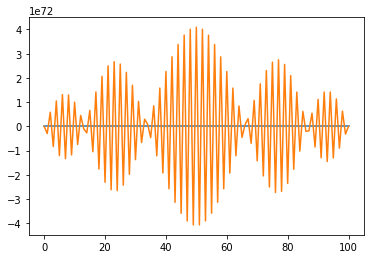

In [26]:
plt.figure()
for j in range(3,5):
    #plt.plot(displacement[j,:])
    plt.plot(old_displacement[old_index[j],:])
plt.show()

### Comments Regarding the Improved Accuracy of Spectral Method


Here you can see that the spectral method took very little time and arrived at identitical answers to the FCTS method for early times. It begins to have clear improvements after an extended period of time( when the waves begin to reflect), because the FCTS method breaks down, wheras our spectral method continues to be correct. 
